In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv(r"D:\Generative AI\NLP_For_Gen_AI\FakeNews\train (2).csv",delimiter=';',nrows=1000)

df.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [3]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   title       1000 non-null   object
 2   text        1000 non-null   object
 3   label       1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [5]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sreedhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text
df['cleaned_text'] = df['text'].apply(clean_text)

In [9]:
df.head()

,Unnamed: 0,title,text,label,cleaned_text
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1,ramallah west bank reuter palestinian switch c...
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1,beij reuter us presidentelect donald trump’ ca...
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0,controversi trump person tax return continu bu...
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1,beij reuter trip beij last week zimbabw milita...
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0,never uncourag person white hous barack obama ...


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: label, Length: 1000, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Logistic Regression

clf = LogisticRegression() 

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",lr_accuracy,'%')


print(metrics.classification_report(y_test, y_pred))


Accuracy: 92.0 %
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        91
           1       0.90      0.96      0.93       109

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



# Support Vector Machine

In [14]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# SVM classifier

clf = svm.SVC() # Create SVM classifier

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
svm_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",svm_accuracy,'%')


print(metrics.classification_report(y_test, y_pred))


Accuracy: 92.5 %
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        91
           1       0.91      0.96      0.93       109

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



# RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
my_rd_classifier=RandomForestClassifier()

# Random Forest

clf=RandomForestClassifier(n_estimators=100,criterion =  "entropy")

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",rf_accuracy,'%')


print(metrics.classification_report(y_test, y_pred))


Accuracy: 96.5 %
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.96      0.97      0.97       109

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



# DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
dt_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",dt_accuracy,'%')


print(metrics.classification_report(y_test, y_pred))


Accuracy: 97.0 %
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.97      0.97      0.97       109

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



# XGBoost

In [17]:
# XGBoost
from xgboost import XGBClassifier
clf=XGBClassifier(n_estimators=30)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",xgb_accuracy,'%')


print(metrics.classification_report(y_test, y_pred))


Accuracy: 97.0 %
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.98      0.96      0.97       109

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [18]:
model_ev = pd.DataFrame({'Model':['LR','RF','XGB','DT','SVM'],
                    'Accuracy %':[lr_accuracy,rf_accuracy,xgb_accuracy,dt_accuracy,svm_accuracy]
                                })

model_ev.sort_values(by='Accuracy %')
model_ev

,Model,Accuracy %
0,LR,92.0
1,RF,96.5
2,XGB,97.0
3,DT,97.0
4,SVM,92.5


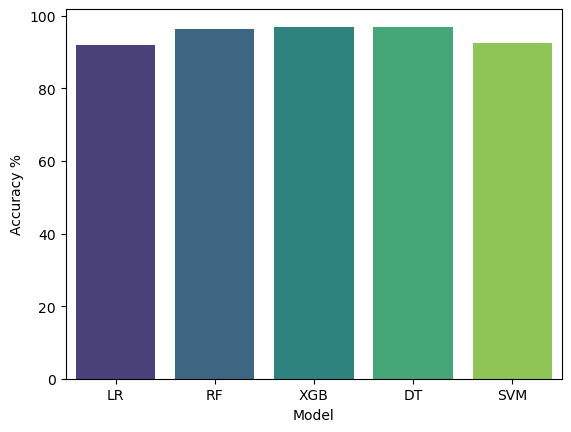

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model',y='Accuracy %',data=model_ev, palette='viridis', hue='Model')
plt.show()